In [1]:
import astropy.units as u
m=13*u.m
t=14*u.s
v=m/t
v.unit

Unit("m / s")

In [1]:
import numpy as np
a=np.linspace(1,10,10)
b=np.linspace(10,20,6)
aa, bb=np.meshgrid(a,b)
bb

array([[10., 10., 10., 10., 10., 10., 10., 10., 10., 10.],
       [12., 12., 12., 12., 12., 12., 12., 12., 12., 12.],
       [14., 14., 14., 14., 14., 14., 14., 14., 14., 14.],
       [16., 16., 16., 16., 16., 16., 16., 16., 16., 16.],
       [18., 18., 18., 18., 18., 18., 18., 18., 18., 18.],
       [20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]])

In [3]:
import gammaALPs as G
alppath=G.__file__
alppath

'C:\\Users\\fredr\\AppData\\Roaming\\Python\\Python37\\site-packages\\gammaALPs\\__init__.py'

In [3]:
from unbinned_lkl import (
    plot_counts_in_energy,
    previous_limits,
    FigSetup,
    compute_ALP_absorption,
    DifferentialCounts,
    GridLikelihood
    )


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('xtick', labelsize=20)   
plt.rc('ytick', labelsize=20)
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=25)

from functools import partial
from scipy.stats import chi2
import numpy as np
import astropy.units as u
from pathlib import Path
import scipy.integrate as integrate
from astropy.coordinates import SkyCoord, Angle
from regions import CircleSkyRegion
from astropy.table import Table

###########__________________________##############

from gammapy.modeling import Fit
import gammapy.irf as irf
from gammapy.irf import load_cta_irfs
from gammapy.data import Observation
from gammapy.utils.random import get_random_state
 
    
    
    ####-----------------------------------###
    
    
    
# models modules
from gammapy.modeling.models import (
    Model,
    Models,
    SkyModel,
    PowerLawSpectralModel,
    PowerLawNormSpectralModel,
    PointSpatialModel,
    GaussianSpatialModel,
    TemplateSpatialModel,
    FoVBackgroundModel,
    SpectralModel,
    Parameter, 
    TemplateSpectralModel
)
# dataset modules
from gammapy.datasets import (
    MapDataset, 
    MapDatasetOnOff, 
    MapDatasetEventSampler,
    SpectrumDatasetOnOff,
    SpectrumDataset, 
    Datasets
)
from gammapy.maps import MapAxis, WcsGeom, Map, MapCoord
from gammapy.makers import MapDatasetMaker, SpectrumDatasetMaker





from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer

In [4]:
def compute_unbinned_likelihood(x, dnde,**kwargs):
    s     = dnde.signal_edisp
    marks = dnde.get_dnde(x,estimated=True)

    return -s  + np.sum(np.log(marks))

In [5]:
source     = Source(z = 0.017559, ra = '03h19m48.1s', dec = '+41d30m42s') # this is for ngc1275

pin        = np.diag((1.,1.,0.)) * 0.5
alp        = ALP(0,0) 
###----------------###

pointing = SkyCoord(150.58 ,-13.26 , frame="icrs", unit="deg")
livetime = 5 * u.hr
irfs     = load_cta_irfs("C:/Users/fredr/gammapy-tutorials/datasets/cta-1dc/caldb/data/cta/1dc/bcf/South_z20_50h/irf_file.fits")
observation = Observation.create( pointing=pointing, livetime=livetime, irfs=irfs)

###---------------###
ALP(0,0)


Invalid unit found in background table! Assuming (s-1 MeV-1 sr-1)


environs.py: 432 --- INFO: Using inputted chi


B [ 0.26030151  0.53801206  1.02231891 ... -8.52425055 -7.34214776
 -4.74580056]
B shape  (4499,)
kn.shape[0]= 220
B [-9.12794772 -7.56836043 -7.04374912 ...  0.04100903  0.39285435
  0.77921225]
B shape  (4499,)


environs.py:1043 --- INFO: Using inputted chi


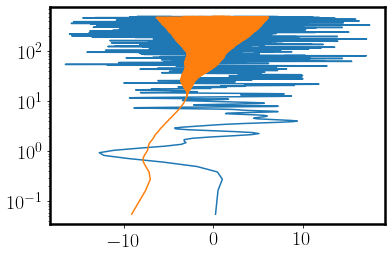

In [6]:
from gammaALPs.bfields.gauss import Bgaussian as b
modulelist1 = ModuleList(alp, source, pin = pin)
modulelist1.alp.m=300
modulelist1.alp.g=0.5
modulelist1.add_propagation("ICMGaussTurb", 
              0, # position of module counted from the source. 
              nsim = 1, # number of random B-field realizations
              B0 = 10.,  # rms of B field
              n0 = 39.,  # normalization of electron density
              n2 = 4.05, # second normalization of electron density, see Churazov et al. 2003, Eq. 4
              r_abell = 500., # extension of the cluster
              r_core = 80.,   # electron density parameter, see Churazov et al. 2003, Eq. 4
              r_core2 = 280., # electron density parameter, see Churazov et al. 2003, Eq. 4
              beta = 1.2,  # electron density parameter, see Churazov et al. 2003, Eq. 4
              beta2= 0.58, # electron density parameter, see Churazov et al. 2003, Eq. 4
              eta = 0.5, # scaling of B-field with electron denstiy
              kL = 0.18, # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012 
              kH = 9.,  # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012
              q = -2.80, # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012
              seed=0 # random seed for reproducability, set to None for random seed.
             )
modulelist1.add_propagation("EBL",1, model = 'dominguez') # EBL attenuation comes second, after beam has left cluster
modulelist1.add_propagation("GMF",2, model = 'jansson12', model_sum = 'ASS') # finally, the beam enters the Milky Way Field
   

   core.py: 665 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMGaussTurb'>


(200, 4499, 3, 3)


C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
   core.py: 665 --- INFO: Running Module 2: <class 'gammaALPs.base.environs.MixGMF'>
C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
   core.py: 665 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMGaussTurb'>


(200, 99, 3, 3)
pxfinal= (1, 200) px= (3, 3)
(200, 4499, 3, 3)


C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
   core.py: 665 --- INFO: Running Module 2: <class 'gammaALPs.base.environs.MixGMF'>
C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(200, 99, 3, 3)
pxfinal= (1, 200) px= (3, 3)


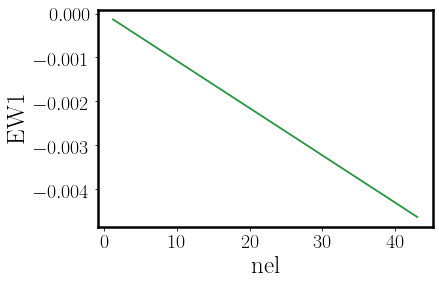

In [7]:
PWL_index = 2.11 # spectral index of the PWL
E0        = 300 # GeV
Ecut      = 560 # GeV
amplitude = 1.54 * 1e-9* u.Unit("TeV-1 cm-2 s-1") # 10e-6 
################------------------------------------------########################
enpoints, pgg   = compute_ALP_absorption(
                    modulelist = modulelist1, # modulelist from gammaALP
                    axion_mass = 300*u.eV, # neV
                    coupling   = 0.5*1/u.GeV, # 10^(-11) /GeV
                    emin       = 10,  # Gev
                    emax       = 1e5, # GeV
                    bins       = 200) # log-bins in enrgy for which computing the ALP-absorption


enpoints, pggEBL = compute_ALP_absorption(
                    modulelist = modulelist1, # modulelist from gammaALP
                    axion_mass = 0*u.neV, # neV
                    coupling   = 0*1e-11/u .GeV , # 10^(-11) /GeV
                    emin       = 10,  # Gev
                    emax       = 1e5, # GeV
                    bins       = 200) # log-bins in enrgy for which computing the ALP-absorption
#####################--------------------------------------########################

pgg  *= np.sum(pggEBL)/np.sum(pgg)

ALP_PWL_flux    = amplitude*pgg*(enpoints/E0)**(-PWL_index)*np.exp(-enpoints/Ecut)


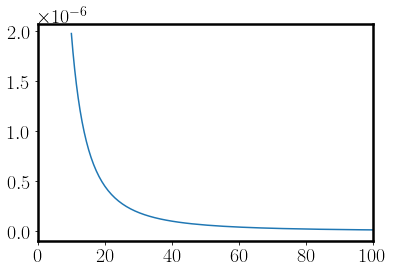

In [8]:
#for p in ALP_PWL_flux:
#    plt.plot(enpoints, ALP_PWL_flux)
a=0

for p in ALP_PWL_flux :
    D=ALP_PWL_flux[a]-ALP_PWL_flux[a-1]
    plt.plot(enpoints, ALP_PWL_flux[a])
    a+=1
    plt.xlim(0,100)
    plt.show()
    #print(D)

   core.py: 665 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMGaussTurb'>


(200, 4499, 3, 3)


C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
   core.py: 665 --- INFO: Running Module 2: <class 'gammaALPs.base.environs.MixGMF'>
C:\Users\fredr\anaconda3\envs\testenv\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(200, 99, 3, 3)
pxfinal= (1, 200) px= (3, 3)


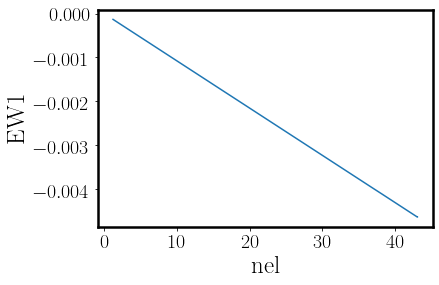

In [9]:
px1,py1,pa1 = modulelist1.run(multiprocess=2)

(10, 100)


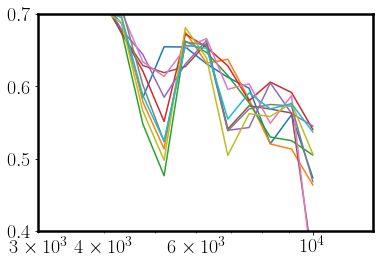

In [26]:
P=px1+py1

EGeV = np.logspace(1,3.5,250)
#print(modulelist1.EGeV.shape)
#print(P)
a=0
pold=0
#DP=pold-pnew
#plt.plot(P,DP)
print(P.shape)
for p in P:
   # pnew=modulelist1.EGeV
    #DP=pold-pnew
    #pold=modulelist1.EGeV
#DP1=
    #plt.subplot()
    plt.xlim(3000,13000,5)
    plt.ylim(0.4,0.7)
    plt.semilogx(modulelist1.EGeV,p)
    #print(DP)
    #a+=1
    #print(P.shape)

In [82]:
a=-1
mod_dict={} #1=spectral,2=spatial,3=sky
models={}
for p in ALP_PWL_flux:
    a+=1
    mod_dict[0,a]      = TemplateSpectralModel(enpoints*u.Unit("GeV"),ALP_PWL_flux[a] ,interp_kwargs={"method": "linear"}) 
    mod_dict[1,a]      = PointSpatialModel(lon_0="150.58 deg", lat_0="-13.26 deg", frame="icrs")
    mod_dict[2,a]      = SkyModel(spectral_model=spectral_model,spatial_model=spatial_model_point, name="point-pwl")
    models[a]   = Models([mod_dict[3,a]]) # , bkg_model] )

In [96]:
print(models[2])

Models

Component 0: SkyModel

  Name                      : point-pwl
  Datasets names            : None
  Spectral model type       : TemplateSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    lon_0                   : 150.580  deg         
    lat_0                   : -13.260  deg         




In [84]:
%%time
energy_axis      = MapAxis.from_energy_bounds( "0.01 TeV", "100 TeV", nbin=15, per_decade=True, name="energy" )
energy_axis_true = MapAxis.from_energy_bounds( "0.01 TeV", "100 TeV", nbin=45, per_decade=True, name="energy_true")
migra_axis       = MapAxis.from_bounds(0.5, 2, nbin=150, node_type="edges", name="migra")

#  MapDatase
geom     = WcsGeom.create(frame="icrs", skydir=pointing, width=(2, 2), binsz=0.02, axes=[energy_axis])
d_empty  = MapDatasetOnOff.create( geom, energy_axis_true=energy_axis_true, migra_axis=migra_axis, name="my-dataset")
maker    = MapDatasetMaker(selection=["exposure","edisp"]) # "background" 
dataset={}
dat_dict={}
b=-1
for a in range(10):
    b+=1
    dataset[b]  = maker.run(d_empty, observation)
    dataset[b].models = models[b]

Wall time: 17.3 s


In [86]:
print(dataset[1].models)

DatasetModels

Component 0: SkyModel

  Name                      : point-pwl
  Datasets names            : None
  Spectral model type       : TemplateSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    lon_0                   : 150.580  deg         
    lat_0                   : -13.260  deg         




C:\Users\fredr\anaconda3\envs\gammapy-0.18.2\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\fredr\anaconda3\envs\gammapy-0.18.2\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\fredr\anaconda3\envs\gammapy-0.18.2\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\fredr\anaconda3\envs\gammapy-0.18.2\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\fredr\anaconda3\envs\gammapy-0.18.2\lib\site-packages\astropy\units\quantity.py:477: RuntimeWarni

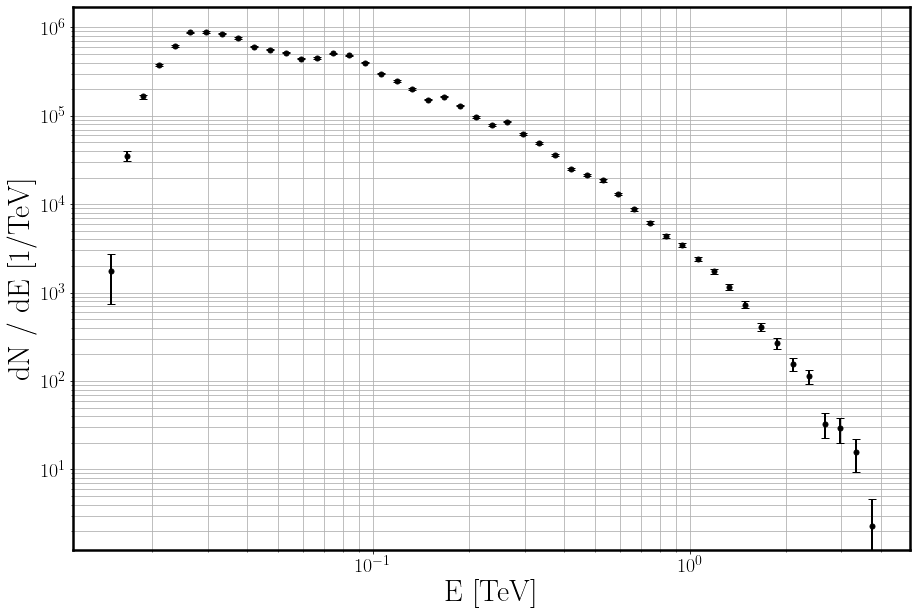

In [95]:
dnde={}
envents_list={}
b=-1
for a in range(10):
    b+=1
    dnde[b]=DifferentialCounts(dataset[b])
    envents_list[b] = dnde[b].simulate_energies(estimated=True)
fig, ax = plt.subplots(figsize=(15,10))

Emin, Emax    = np.min(envents_list[1]), np.max(envents_list[1])
plot_dict = dict(color='black',label="Observed dN/dE")
ax      = plot_counts_in_energy(ax,envents_list[1].value, Emin.value,Emax.value,en_bins=50,**plot_dict)
